In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('../data/menu_data.xlsx')
df.head(5)

,메뉴,재료 추가,빵,치즈,제외 야채,소스
0,8,4,3,1,0,"4,5"
1,11,7,3,2,0,"5,14"
2,18,7,3,2,0,"5,14"
3,8,2,5,2,0,"3,5"
4,5,0,5,1,"7,8","1,3,5"


In [3]:
df['재료 추가'] = df['재료 추가'].str.split(',')

In [4]:
df['제외 야채'] = df['제외 야채'].str.split(',')

In [5]:
df['소스'] = df['소스'].str.split(',')

In [6]:
df['재료 추가'] = df['재료 추가'].apply(lambda x: ['0'] if isinstance(x,float) else x)

In [7]:
df['제외 야채'] = df['제외 야채'].apply(lambda x: ['0'] if isinstance(x,float) else x)

In [8]:
df['소스'] = df['소스'].apply(lambda x: ['0'] if isinstance(x,float) else x)

In [9]:
df

,메뉴,재료 추가,빵,치즈,제외 야채,소스
0,8,[0],3,1,[0],"[4, 5]"
1,11,[0],3,2,[0],"[5, 14]"
2,18,[0],3,2,[0],"[5, 14]"
3,8,[0],5,2,[0],"[3, 5]"
4,5,[0],5,1,"[7, 8]","[1, 3, 5]"
...,...,...,...,...,...,...
1320,9,[0],1,1,[0],"[10, 13]"
1321,9,[0],3,1,[0],"[10, 13]"
1322,3,[0],2,2,[0],"[10, 13]"
1323,3,[0],5,3,[0],"[10, 14]"


In [10]:
menu = ['머쉬룸', '쉬림프', '로티세리 바비큐 치킨', '이탈리안 비엠티', '로스트 치킨', '에그마요', 'K-바비큐', '풀드 포크 바비큐', '비엘티',
       '햄', '참치', '써브웨이 클럽', '베지', '스테이크 & 치즈', '스파이시 이탈리안', '치킨 데리야끼']
bread = ['허니오트', '하티', '위트', '파마산 오레가노', '화이트', '플랫 브래드']
cheese = ['아메리칸 치즈', '슈레드 치즈', '모차렐라 치즈', '치즈 제외']
vege = ['제외 안함', '양상추', '토마토', '오이', '피망', '양파', '피클', '올리브', '할라피뇨']
source = ['소스 제외', '랜치', '마요네즈', '스위트 어니언', '허니 머스타드', '스위트 칠리', '핫 칠리', '사우스웨스트 치폴레', '머스타드',
         '홀스래디쉬', '올리브 오일', '레드와인식초', '소금', '후추', '스모크 바비큐', '이탈리안 드레싱']
ingredient = ['추가 안함', '미트', '에그마요', '페퍼로니', '베이컨', '아보카도', '오믈렛', '치즈']

In [11]:
len(menu)

16

In [12]:
df.columns

Index(['메뉴', '재료 추가', '빵', '치즈', '제외 야채', '소스'], dtype='object')

In [13]:
df.head()

,메뉴,재료 추가,빵,치즈,제외 야채,소스
0,8,[0],3,1,[0],"[4, 5]"
1,11,[0],3,2,[0],"[5, 14]"
2,18,[0],3,2,[0],"[5, 14]"
3,8,[0],5,2,[0],"[3, 5]"
4,5,[0],5,1,"[7, 8]","[1, 3, 5]"


In [14]:
menu_count = df[['메뉴']].value_counts()

In [15]:
menu_list = [i for i in range(3,19)]
menu_count = [menu_count[i] for i in menu_list]

In [16]:
menu_count

[4, 43, 74, 171, 105, 146, 10, 85, 140, 19, 38, 173, 88, 107, 99, 20]

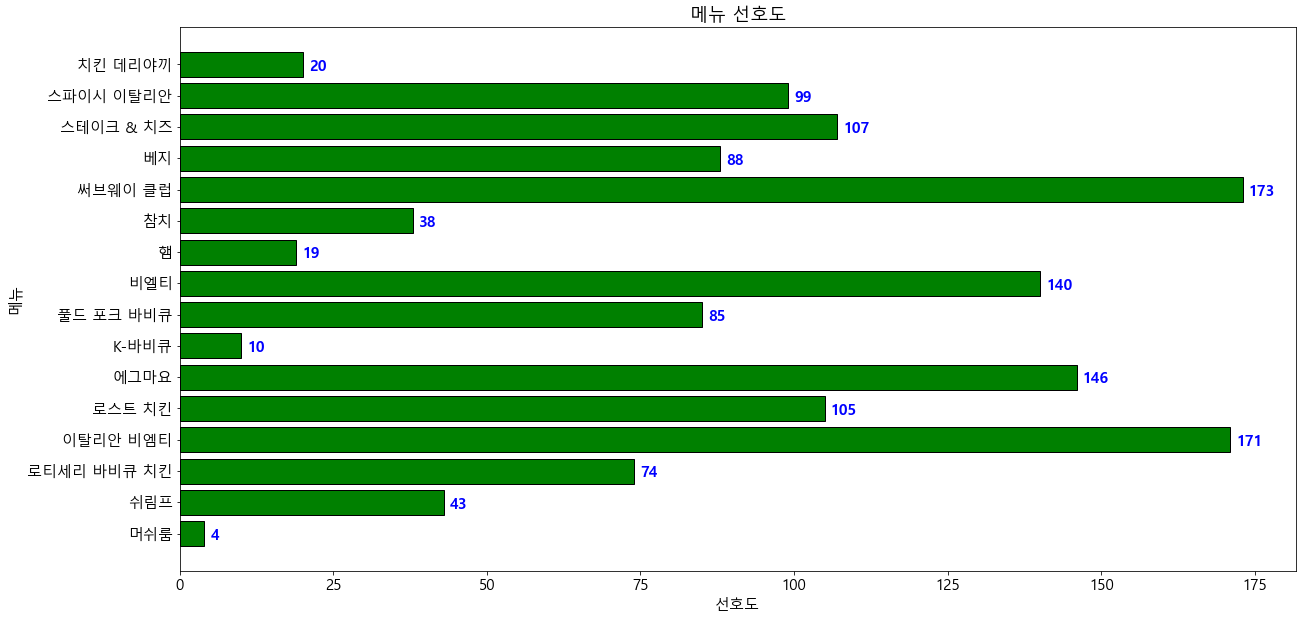

In [17]:
plt.figure(figsize=(20, 10))
bar = plt.barh(menu_list, menu_count, color='green', ec='k')
plt.title('메뉴 선호도')
plt.ylabel('메뉴')
plt.xlabel('선호도')
plt.yticks(menu_list, menu)
for idx, val in enumerate(menu_count):
    plt.text(val + 1, idx+2.8, str(val), color='blue', fontweight='bold')
plt.show()

In [18]:
bread_count = df[['빵']].value_counts()

In [19]:
bread_list = [i for i in range(1,7)]
bread_count = [bread_count[i] for i in bread_list]

In [20]:
bread_count

[234, 159, 251, 196, 205, 280]

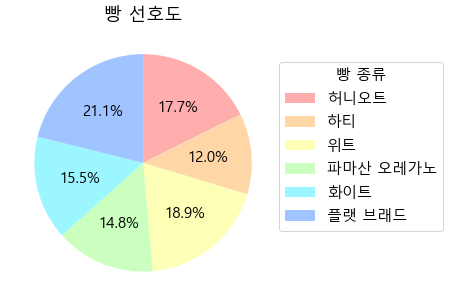

In [21]:
plt.figure(figsize=(10, 5))
plt.pie(bread_count, autopct='%.1f%%', startangle=90, counterclock=False, colors=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']) # values만 가지고도 차트 생성 가능
plt.title('빵 선호도')
plt.legend(labels=bread,loc=(1, 0.25), title='빵 종류')
plt.show()

In [22]:
cheese_count = df[['치즈']].value_counts()

In [23]:
cheese_list = [i for i in range(1,5)]
cheese_count = [cheese_count[i] for i in cheese_list]

In [24]:
cheese_count

[476, 370, 371, 108]

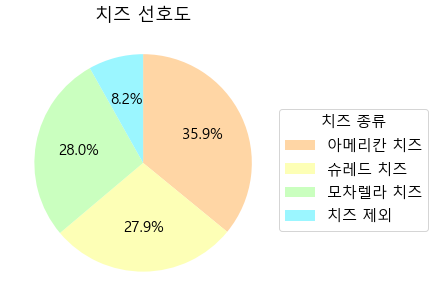

In [25]:
plt.figure(figsize=(10, 5))
plt.pie(cheese_count, autopct='%.1f%%', startangle=90, counterclock=False, colors=['#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff']) # values만 가지고도 차트 생성 가능
plt.title('치즈 선호도')
plt.legend(labels = cheese, loc=(1, 0.25), title='치즈 종류')
plt.show()

In [26]:
source_list = [str(i) for i in range(0,16)]
source_list

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15']

In [27]:
source_count = {}
for i in source_list:
    source_count[i] = 0
source_count

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0}

In [28]:
for i in range(0, df.index.max()+1):
    for j in df.iloc[i]['소스']:
        source_count[j] += 1

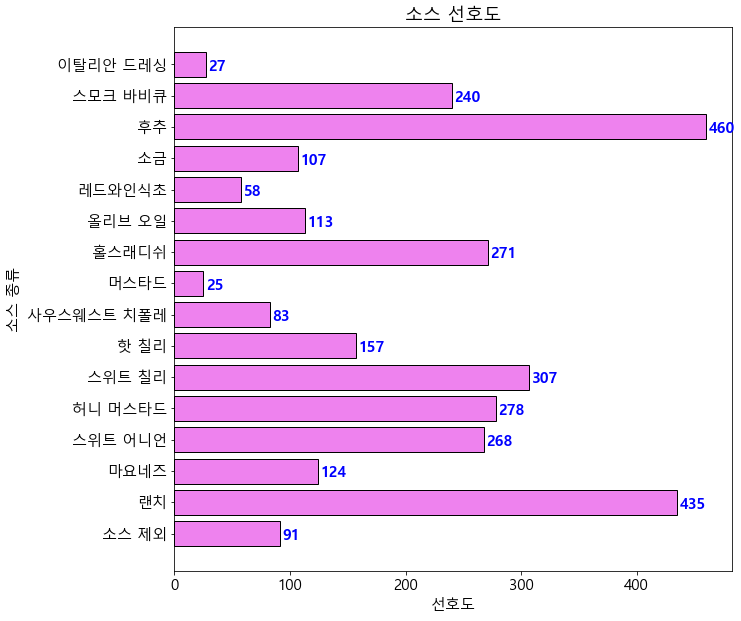

In [29]:
plt.figure(figsize=(10, 10))
bar = plt.barh(list(source_count.keys()), list(source_count.values()), color='violet', ec='k')
plt.title('소스 선호도')
plt.ylabel('소스 종류')
plt.xlabel('선호도')
plt.yticks(list(source_count.keys()),source)
for idx, val in enumerate(source_count.values()):
    plt.text(val + 2, idx-0.2, str(val), color='blue', fontweight='bold')
plt.show()

In [30]:
vege_list = [str(i) for i in range(0,9)]
vege_list

['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [31]:
vege_count = {}
for i in vege_list:
    vege_count[i] = 0
vege_count

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}

In [32]:
for i in range(0, df.index.max()+1):
    for j in df.iloc[i]['제외 야채']:
        vege_count[j] += 1

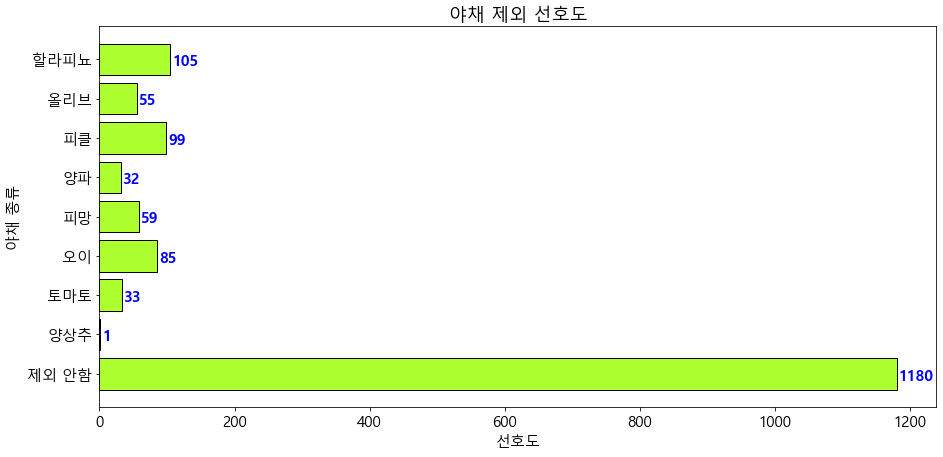

In [33]:
plt.figure(figsize=(15,7))
bar = plt.barh(list(vege_count.keys()), list(vege_count.values()), color='greenyellow', ec='k')
plt.title('야채 제외 선호도')
plt.ylabel('야채 종류')
plt.xlabel('선호도')
plt.yticks(list(vege_count.keys()), vege)
for idx, val in enumerate(vege_count.values()):
    plt.text(val + 3, idx-0.15, str(val), color='blue', fontweight='bold')
plt.show()

In [34]:
ingredient_list = [str(i) for i in range(0,8)]
ingredient_list

['0', '1', '2', '3', '4', '5', '6', '7']

In [35]:
ingredient_count = {}
for i in ingredient_list:
    ingredient_count[i] = 0
ingredient_count

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0}

In [36]:
for i in range(0, df.index.max()+1):
    for j in df.iloc[i]['재료 추가']:
        ingredient_count[j] += 1

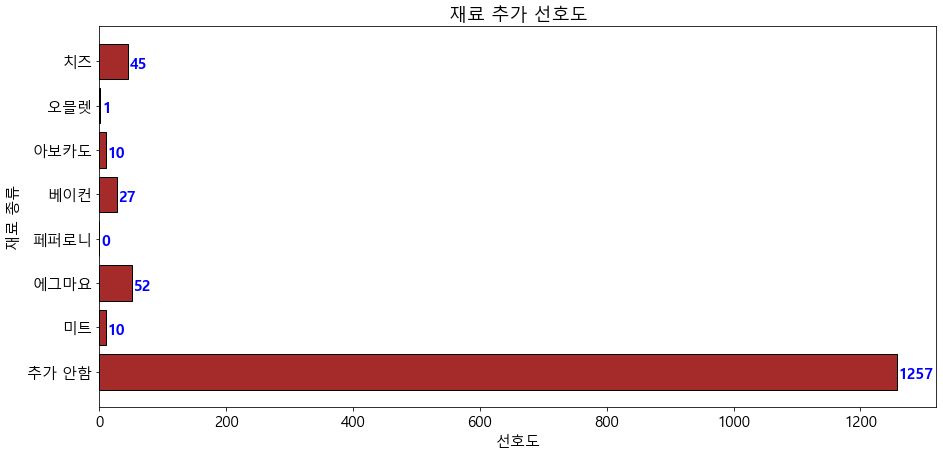

In [37]:
plt.figure(figsize=(15, 7))
bar = plt.barh(list(ingredient_count.keys()), list(ingredient_count.values()), color='brown', ec='k')
plt.title('재료 추가 선호도')
plt.ylabel('재료 종류')
plt.xlabel('선호도')
plt.yticks(list(ingredient_count.keys()), ingredient)
for idx, val in enumerate(ingredient_count.values()):
    plt.text(val + 3, idx-0.15, str(val), color='blue', fontweight='bold')
plt.show()